In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.rcdefaults()

#Extracting data:

project1_df = pd.read_csv('/Users/MIGUEL/Desktop/CLAB1/Ironhack-Module-1-Project---Pipelines-/data/processed/df_totalCLEAN.csv')
project2_df = pd.read_csv('/Users/MIGUEL/Desktop/CLAB1/Ironhack-Module-1-Project---Pipelines-/data/processed/df_project2CLEAN.csv')

#Basics Analytics:

print(project1_df.info(memory_usage='deep'))
print(project1_df.describe(include='all'))

    #Checking Outliers: 

stats = project1_df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

outliers = pd.DataFrame(columns=project1_df.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = project1_df[(project1_df[col] < lower) | 
                   (project1_df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    'sort=False'

outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 9 columns):
age                          2208 non-null object
gender                       2208 non-null object
country                      2208 non-null object
image                        2208 non-null object
name                         2208 non-null object
position                     2208 non-null int64
Source                       2208 non-null object
worth BUSD                   2208 non-null int64
 worthChange millions USD    2208 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.2 MB
None
         age gender country  \
count   2208   2208    2208   
unique    75      3      59   
top       64   Male    None   
freq      70   1460    1410   
mean     NaN    NaN     NaN   
std      NaN    NaN     NaN   
min      NaN    NaN     NaN   
25%      NaN    NaN     NaN   
50%      NaN    NaN     NaN   
75%      NaN    NaN     NaN   
max      NaN    NaN     NaN   

                    

/Users/MIGUEL/miniconda3/envs/base2/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,worthChange millions USD,Outlier,Source,age,country,gender,image,name,position,worth BUSD
0,0,worth BUSD,Technology ==> Amazon,54,None,Male,https://specials-images.forbesimg.com/imageser...,jeff bezos,1,112
1,0,worth BUSD,Technology ==> Microsoft,62,United States,None,https://specials-images.forbesimg.com/imageser...,bill gates,2,90
2,0,worth BUSD,Finance and Investments ==> Berkshire Hathaway,87,United States,Male,https://specials-images.forbesimg.com/imageser...,warren buffett,3,84
3,0,worth BUSD,Fashion & Retail ==> LVMH,69,None,None,https://specials-images.forbesimg.com/imageser...,bernard arnault,4,72
4,0,worth BUSD,Technology ==> Facebook,35,None,Male,https://specials-images.forbesimg.com/imageser...,mark zuckerberg,5,71
...,...,...,...,...,...,...,...,...,...,...
1943,-17,worthChange millions USD,Construction & Engineering ==> construction m...,46,None,None,https://specials-images.forbesimg.com/imageser...,andrei molchanov,1944,1
1950,-18,worthChange millions USD,Energy ==> oil & gas,80,None,None,https://specials-images.forbesimg.com/imageser...,clayton riddell,1951,1
2069,-1,worthChange millions USD,Healthcare ==> pharmaceuticals,67,None,None,https://specials-images.forbesimg.com/imageser...,john martin,2070,1
2076,10,worthChange millions USD,Finance and Investments ==> investments,64,None,None,https://specials-images.forbesimg.com/imageser...,liora ofer,2077,1


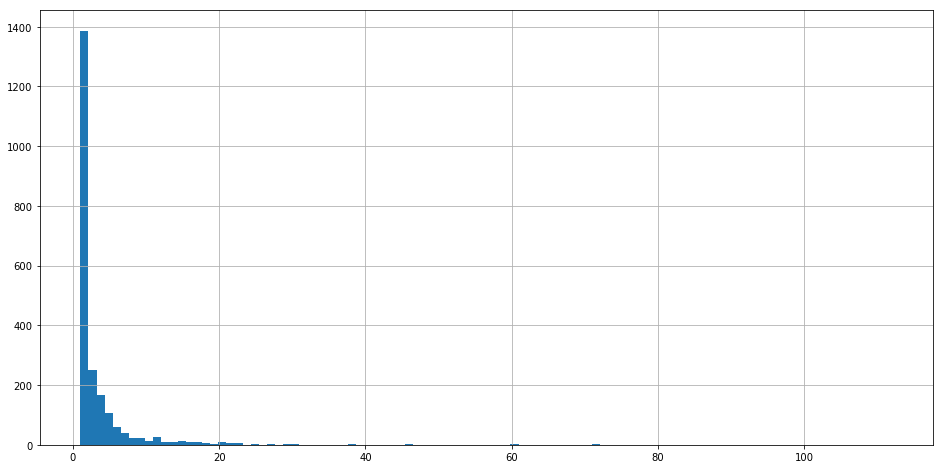

In [2]:
#Graphic 1: worth BUSD - full dataframe
graphic_1 = project1_df['worth BUSD'].hist(bins=100, figsize=(16,8))
graphic_1

plt.savefig("worth BUSD deviation.png", bbox_inches='tight')


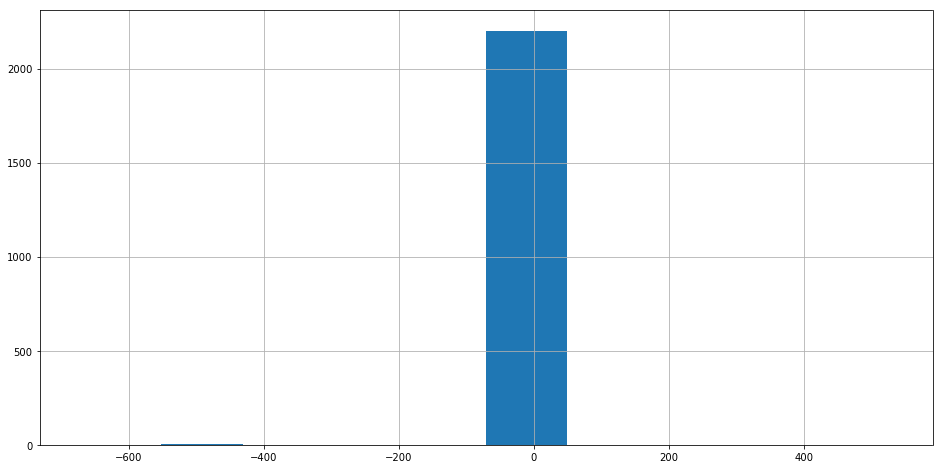

In [3]:
#Graphic 2: wortChange millions USD - full dataframe
graphic_2 = project1_df[' worthChange millions USD'].hist(bins=10, figsize=(16,8))
graphic_2

plt.savefig("worthChange millions USD", bbox_inches='tight')

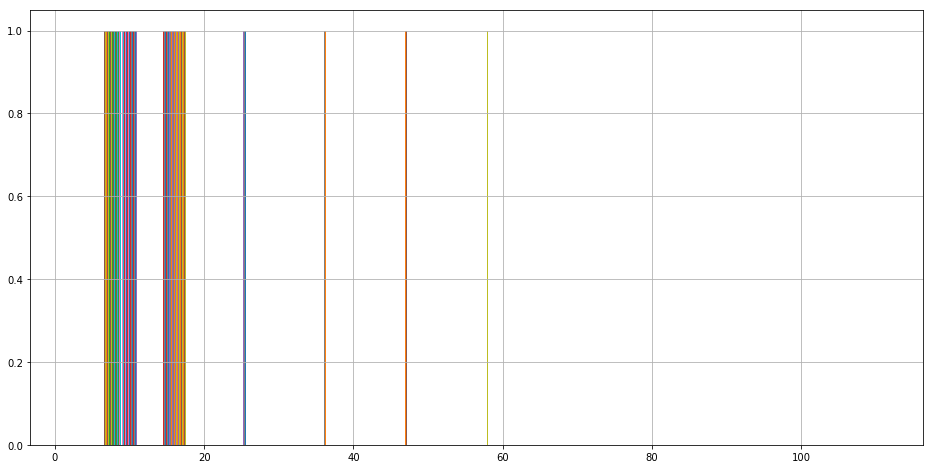

In [4]:
#Graphic 3: worth BUSD - outliers dataframe 
graphic_3 = outliers['worth BUSD'].hist(bins=10, figsize=(16,8))
graphic_3

plt.savefig("worth BUSD - outliers", bbox_inches='tight')

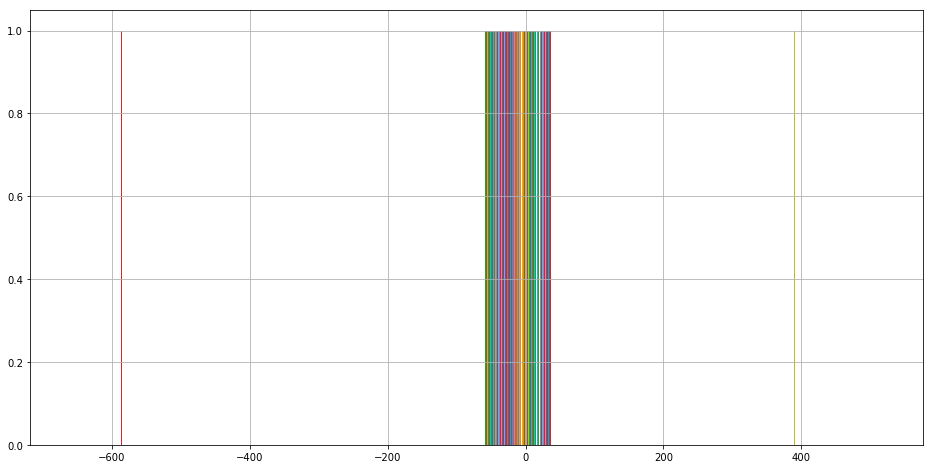

In [5]:
#Graphic 4: wortChange millions USD - dataframe outliers
graphic_4 = outliers[' worthChange millions USD'].hist(bins=10, figsize=(16,8))
graphic_4

plt.savefig("worthChange millions USD - outliers", bbox_inches='tight')

In [6]:
project1_df

,age,gender,country,image,name,position,Source,worth BUSD,worthChange millions USD
0,54,Male,None,https://specials-images.forbesimg.com/imageser...,jeff bezos,1,Technology ==> Amazon,112,0
1,62,None,United States,https://specials-images.forbesimg.com/imageser...,bill gates,2,Technology ==> Microsoft,90,0
2,87,Male,United States,https://specials-images.forbesimg.com/imageser...,warren buffett,3,Finance and Investments ==> Berkshire Hathaway,84,0
3,69,None,None,https://specials-images.forbesimg.com/imageser...,bernard arnault,4,Fashion & Retail ==> LVMH,72,0
4,35,Male,None,https://specials-images.forbesimg.com/imageser...,mark zuckerberg,5,Technology ==> Facebook,71,0
...,...,...,...,...,...,...,...,...,...
2203,51,None,China,https://specials-images.forbesimg.com/imageser...,zhao xiaoqiang,2204,"Fashion & Retail ==> fashion, entertainment",1,0
2204,55,Male,None,https://specials-images.forbesimg.com/imageser...,zhou liangzhang,2205,Manufacturing ==> electrical equipment,1,0
2205,51,None,China,https://specials-images.forbesimg.com/imageser...,zhu xingming,2206,Manufacturing ==> electrical equipment,1,0
2206,52,Female,None,https://specials-images.forbesimg.com/imageser...,zhuo jun,2207,Manufacturing ==> printed circuit boards,1,0


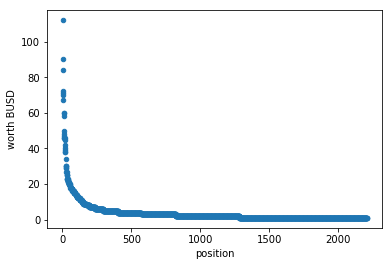

In [7]:
#Graphic 5: Scattter position - worth
my_plot = project1_df.plot("position", "worth BUSD", kind="scatter")

plt.savefig("scatter position - worth") 

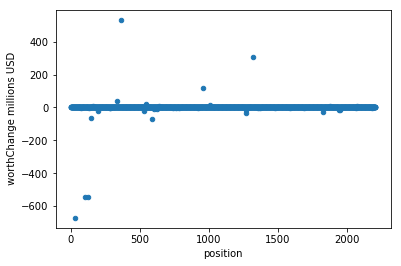

In [8]:
#Graphic 6: Scatter position - worthChange 
my_plot2 = project1_df.plot("position", " worthChange millions USD", kind="scatter")

plt.savefig("scatter position-worthchange")

/Users/MIGUEL/miniconda3/envs/base2/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


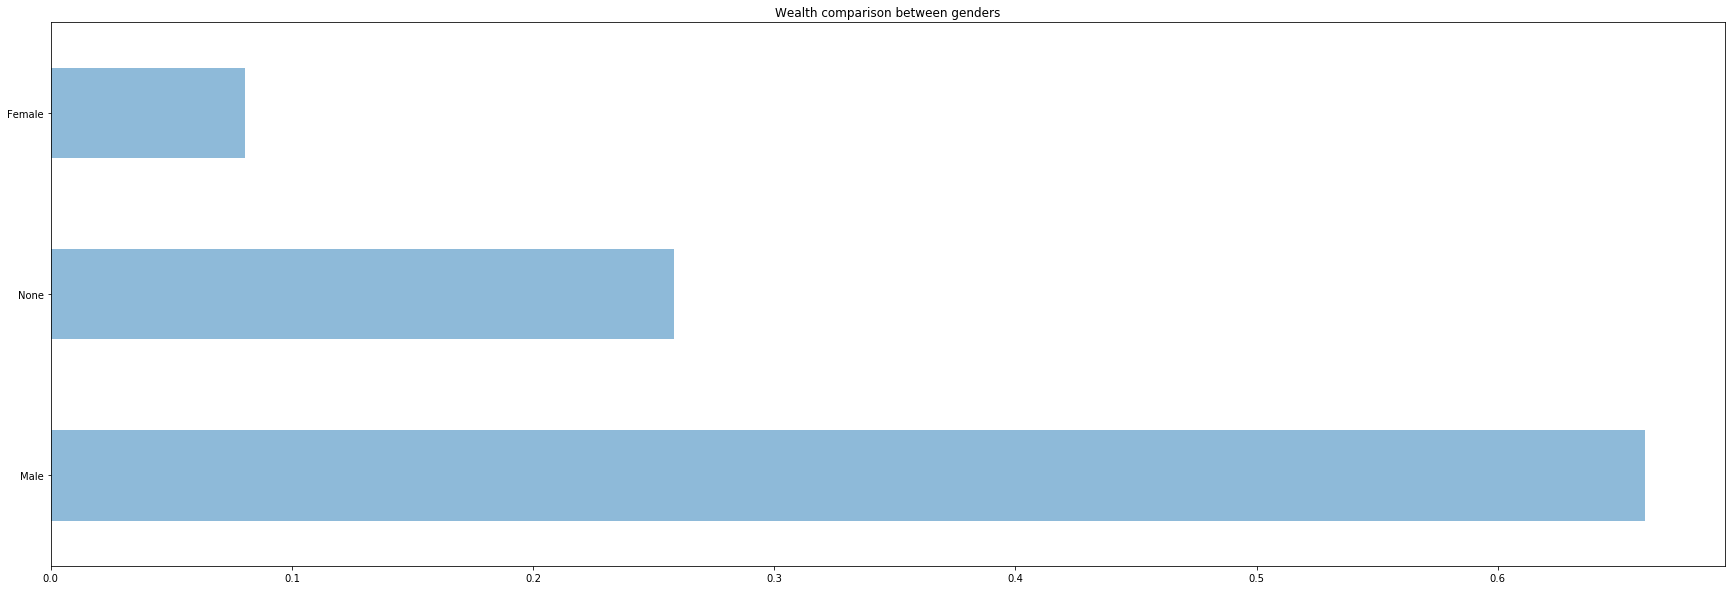

In [9]:
#Wealth comparison between genders
    #Stadistics

wealth_comparison = project1_df.groupby(['gender','worth BUSD']).agg(['count', 'mean'])
wealth_comparison

    #Graphic7

fig = plt.figure(figsize=(30,10))
project1_df.gender[project1_df.position].value_counts(normalize = True).plot(kind='barh', alpha=0.5)
plt.title('Wealth comparison between genders')

plt.savefig("Wealth comparison between genders") 


In [11]:
project2_df

,Rank,country,Population,% of World Population,Date,Source_x,age,gender,image,name,position,Source_y,worth BUSD,worthChange millions USD
0,1,China,"1,400,795,960",18.1%,8 Jan 2020,National population clock,55,Male,https://specials-images.forbesimg.com/imageser...,li shufu,92,Automotive ==> automobiles,15,0
1,1,China,"1,400,795,960",18.1%,8 Jan 2020,National population clock,48,None,https://specials-images.forbesimg.com/imageser...,lei jun,118,Technology ==> smartphones,12,0
2,1,China,"1,400,795,960",18.1%,8 Jan 2020,National population clock,48,Male,https://specials-images.forbesimg.com/imageser...,pan zhengmin,156,Technology ==> electronics,9,0
3,1,China,"1,400,795,960",18.1%,8 Jan 2020,National population clock,72,Male,https://specials-images.forbesimg.com/imageser...,zong qinghou,161,Food and Beverage ==> beverages,9,0
4,1,China,"1,400,795,960",18.1%,8 Jan 2020,National population clock,51,None,https://specials-images.forbesimg.com/imageser...,guo guangchang,187,Diversified ==> conglomerate,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,136,Qatar,"2,747,282",0.0354%,30 Sep 2019,Monthly National estimate[128],58,None,https://specials-images.forbesimg.com/imageser...,hamad bin jassim bin jaber al thani,1867,Finance and Investments ==> investments,1,0
647,157,Cyprus,"875,900",0.0113%,31 Dec 2018,National annual estimate[148],51,None,https://specials-images.forbesimg.com/imageser...,stelios haji-ioannou,1506,Service ==> EasyJet,1,0
648,157,Cyprus,"875,900",0.0113%,31 Dec 2018,National annual estimate[148],47,Female,https://specials-images.forbesimg.com/imageser...,clelia haji-ioannou,1779,Service ==> EasyJet,1,0
649,157,Cyprus,"875,900",0.0113%,31 Dec 2018,National annual estimate[148],63,None,https://specials-images.forbesimg.com/imageser...,surendra hiranandani,1784,Real Estate ==> real estate,1,0


                         position               worthChange millions USD     
                            count         mean                     count mean
country       worth BUSD                                                     
Algeria       4                 1   563.000000                         1  0.0
Angola        2                 1   933.000000                         1  0.0
Argentina     1                 1  1378.000000                         1  0.0
              3                 1   796.000000                         1  0.0
Australia     1                11  1815.727273                        11  0.0
...                           ...          ...                       ...  ...
United States 21                1    44.000000                         1  0.0
              23                1    34.000000                         1  0.0
              84                1     3.000000                         1  0.0
              90                1     2.000000                  

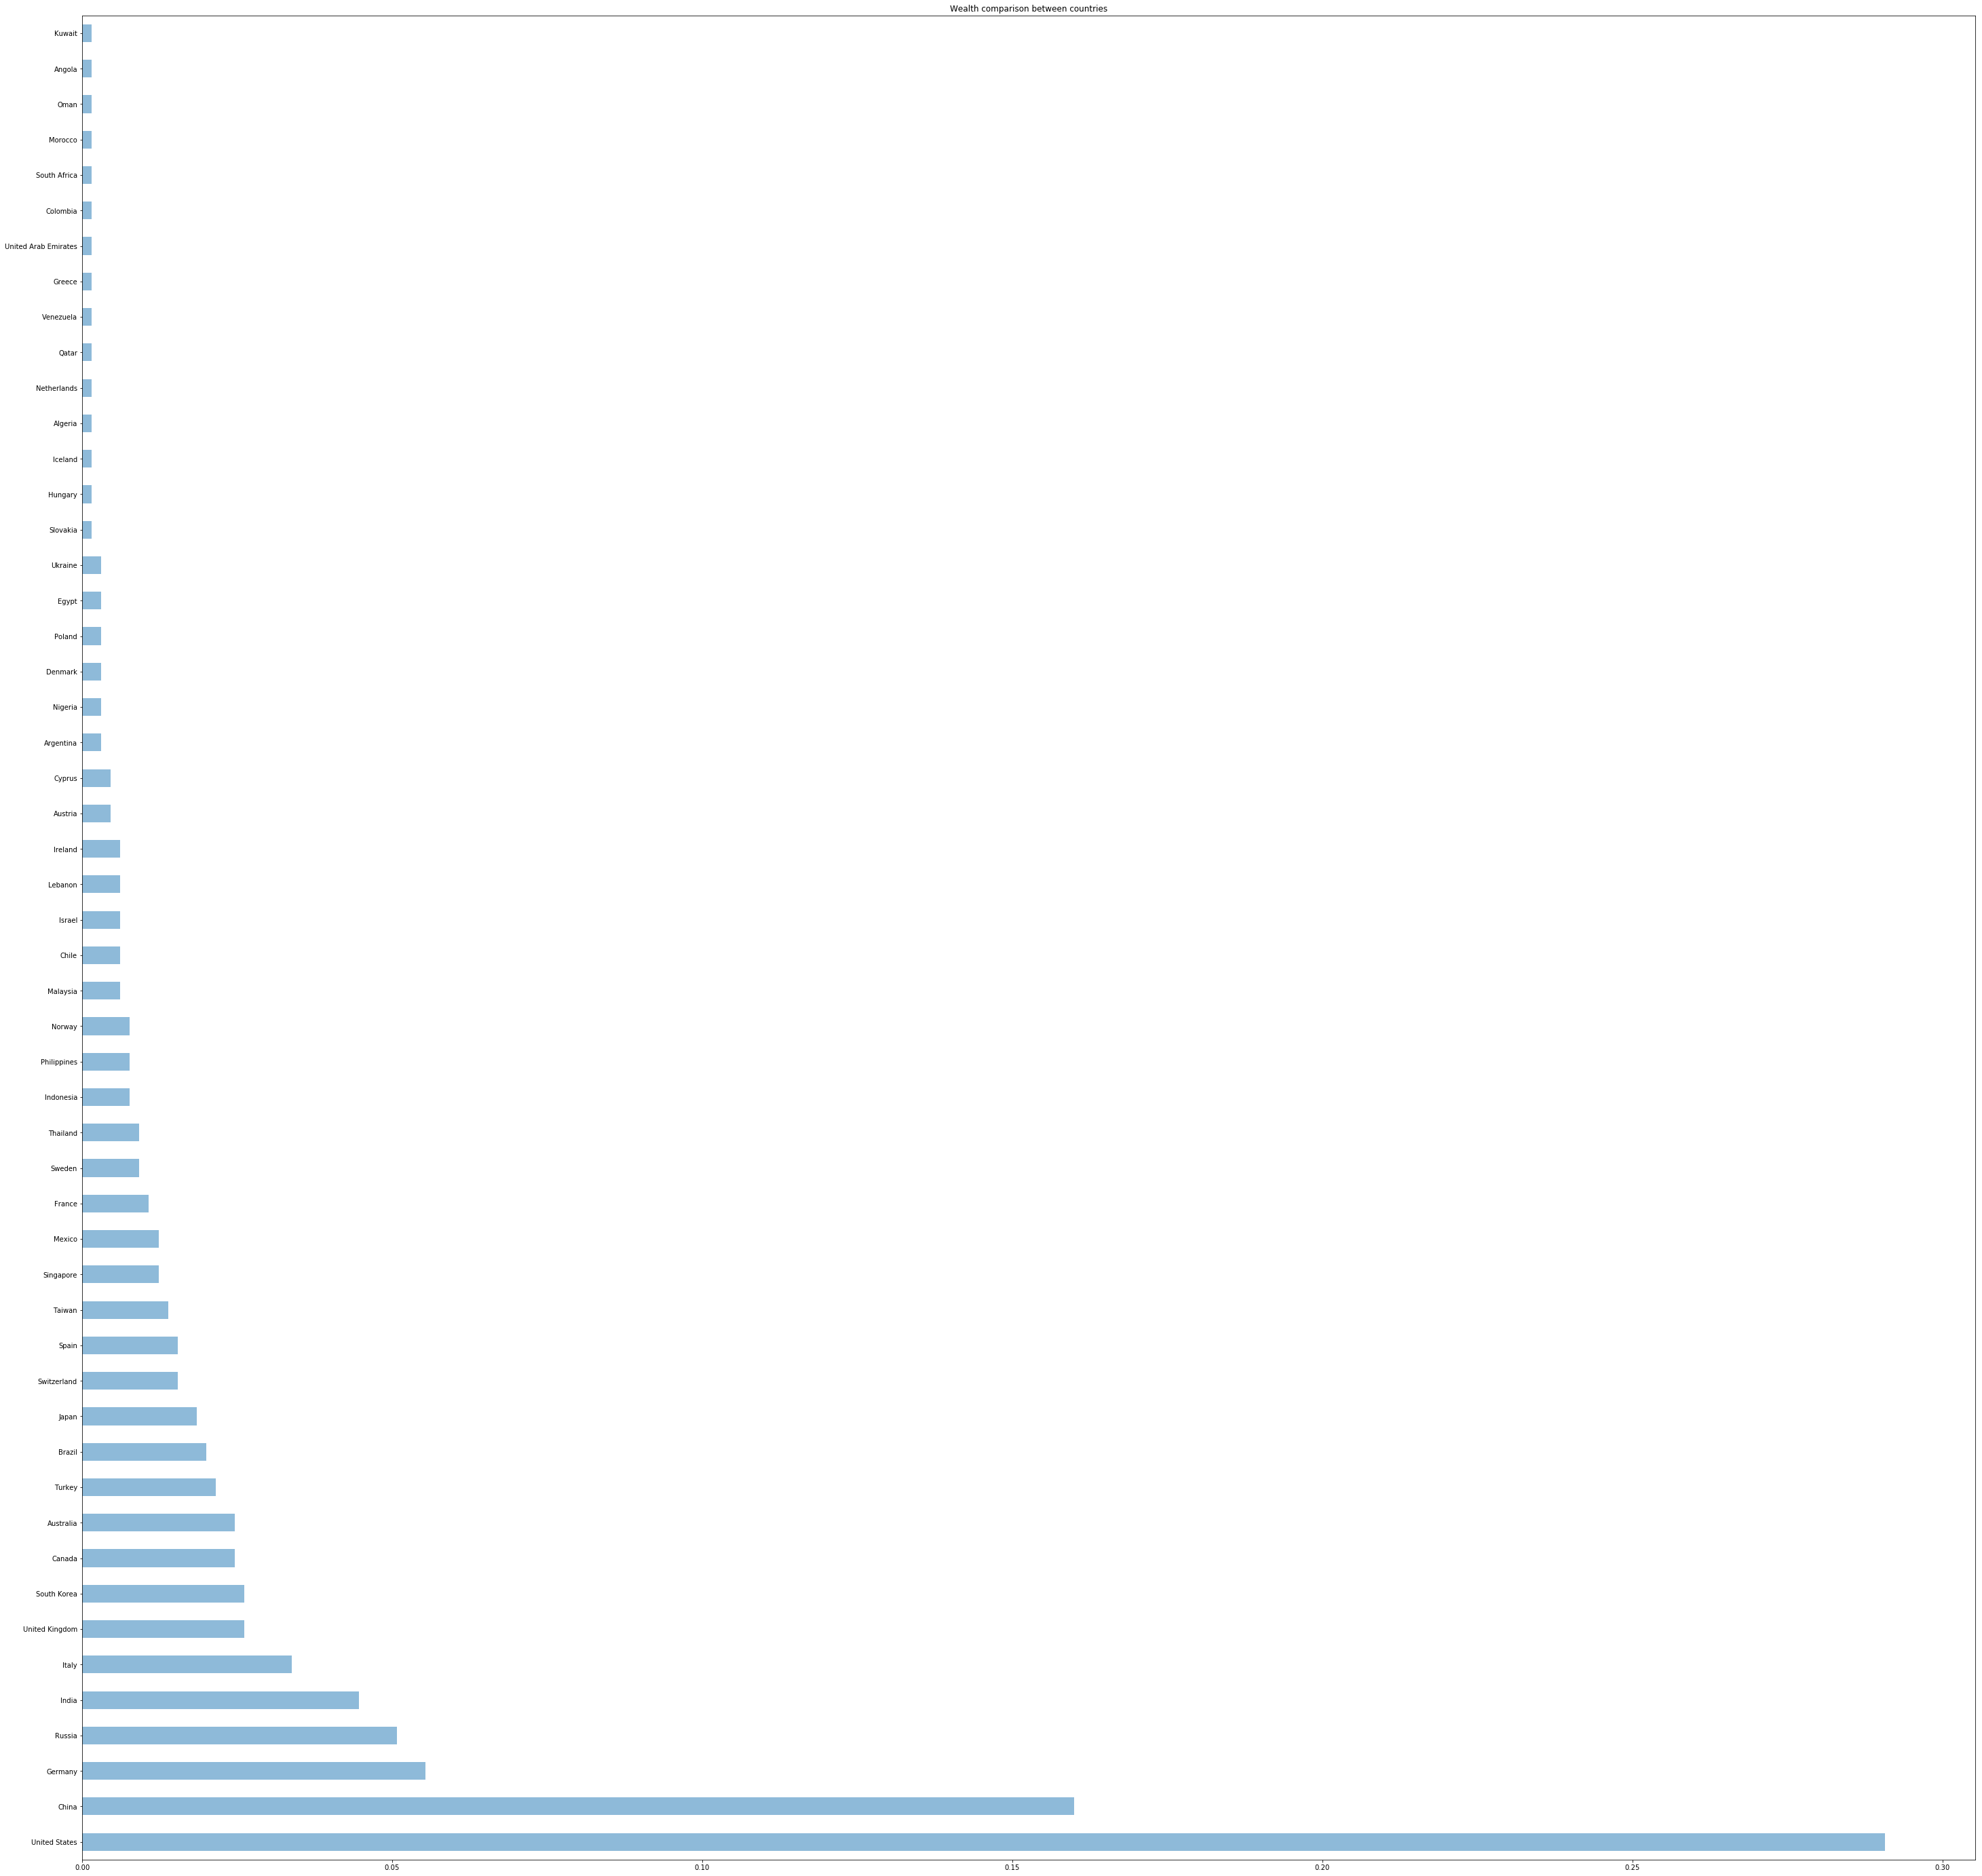

In [14]:
#Wealth comparison between countries 
    #Stadistics

wealth_comparison = project2_df.groupby(['country','worth BUSD']).agg(['count', 'mean'])
print(wealth_comparison)

    #Graphic8

fig = plt.figure(figsize=(50,50))
project2_df.country[project1_df.position].value_counts(normalize = True).plot(kind='barh', alpha=0.5)
plt.title('Wealth comparison between countries')

plt.savefig("Wealth comparison between countries") 

In [15]:
#Outliers - Project2_df

stats2 = project2_df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats2

outliers2 = pd.DataFrame(columns=project1_df.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = project2_df[(project2_df[col] < lower) | 
                   (project2_df[col] > upper)].copy()
    results['Outliers2'] = col
    outliers2 = outliers2.append(results)
    'sort=False'

outliers2



,% of World Population,worthChange millions USD,Date,Outliers2,Population,Rank,Source,Source_x,Source_y,age,country,gender,image,name,position,worth BUSD
0,18.1%,0,8 Jan 2020,worth BUSD,"1,400,795,960",1,NaN,National population clock,Automotive ==> automobiles,55,China,Male,https://specials-images.forbesimg.com/imageser...,li shufu,92,15
1,18.1%,0,8 Jan 2020,worth BUSD,"1,400,795,960",1,NaN,National population clock,Technology ==> smartphones,48,China,None,https://specials-images.forbesimg.com/imageser...,lei jun,118,12
2,18.1%,0,8 Jan 2020,worth BUSD,"1,400,795,960",1,NaN,National population clock,Technology ==> electronics,48,China,Male,https://specials-images.forbesimg.com/imageser...,pan zhengmin,156,9
3,18.1%,0,8 Jan 2020,worth BUSD,"1,400,795,960",1,NaN,National population clock,Food and Beverage ==> beverages,72,China,Male,https://specials-images.forbesimg.com/imageser...,zong qinghou,161,9
105,17.5%,0,8 Jan 2020,worth BUSD,"1,357,082,950",2,NaN,National population clock,"Energy ==> petrochemicals, oil & gas",61,India,Male,https://specials-images.forbesimg.com/imageser...,mukesh ambani,19,40
106,17.5%,0,8 Jan 2020,worth BUSD,"1,357,082,950",2,NaN,National population clock,Technology ==> software services,72,India,Male,https://specials-images.forbesimg.com/imageser...,azim premji,59,18
107,17.5%,0,8 Jan 2020,worth BUSD,"1,357,082,950",2,NaN,National population clock,Technology ==> software services,72,India,Male,https://specials-images.forbesimg.com/imageser...,shiv nadar,98,14
108,17.5%,0,8 Jan 2020,worth BUSD,"1,357,082,950",2,NaN,National population clock,"Finance and Investments ==> investments, retail",63,India,Male,https://specials-images.forbesimg.com/imageser...,radhakishan damani,151,10
134,4.26%,0,8 Jan 2020,worth BUSD,"330,552,139",3,NaN,National population clock,Technology ==> Microsoft,62,United States,None,https://specials-images.forbesimg.com/imageser...,bill gates,2,90
135,4.26%,0,8 Jan 2020,worth BUSD,"330,552,139",3,NaN,National population clock,Finance and Investments ==> Berkshire Hathaway,87,United States,Male,https://specials-images.forbesimg.com/imageser...,warren buffett,3,84


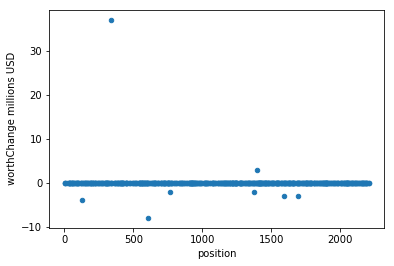

In [24]:
#Graphic9: 

my_plot2 = project2_df.plot("position", " worthChange millions USD", kind="scatter")

plt.savefig("scatter-outliers-scrapping")